# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Drugs_dataset.csv")

In [3]:
df1=df.copy()

# EDA

## Numerical

In [4]:
df.head(5)

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug,Interaction
0,120,0.5,350,2.5,5.0,550.0,45.0,12.0,120.0,Warfarin,Major
1,50,0.0,100,1.0,2.0,10.0,5.0,5.0,20.0,Warfarin,NaN
2,2300,1.0,400,3.0,15.0,25.0,10.0,20.0,50.0,Warfarin,NaN
3,150,0.2,200,4.5,8.0,120.0,60.0,8.0,80.0,Warfarin,Minor
4,80,0.0,150,0.5,0.0,5.0,2.0,15.0,30.0,Warfarin,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sodium       380 non-null    int64  
 1   Tyramine     380 non-null    float64
 2   Potassium    380 non-null    int64  
 3   Fiber        380 non-null    float64
 4   Sugar        380 non-null    float64
 5   Vit K        380 non-null    float64
 6   Vit C        380 non-null    float64
 7   Protein      380 non-null    float64
 8   Calcium      380 non-null    float64
 9   Drug         380 non-null    object 
 10  Interaction  202 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 32.8+ KB


interaction null means none so needs to be fixed  

drugs and interaction needs to be label encoded

In [6]:
df.describe()

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,520.571053,2.179737,386.142105,3.931579,11.826579,62.779737,26.834737,18.172368,109.975789
std,628.052409,6.443731,291.164337,4.259523,9.267918,113.863229,38.837149,11.695330,106.304402
min,10.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,110.000000,0.000000,200.000000,1.500000,5.000000,14.750000,5.925000,9.150000,48.000000
50%,275.000000,0.000000,320.000000,2.700000,10.000000,29.000000,15.000000,16.000000,84.500000
75%,630.000000,1.100000,480.000000,4.500000,17.000000,55.000000,30.000000,25.000000,128.250000
max,2850.000000,46.000000,1700.000000,25.000000,55.000000,820.000000,275.000000,66.000000,660.000000


data needs scaling because different values have different max

## Visualizations

### Distributions

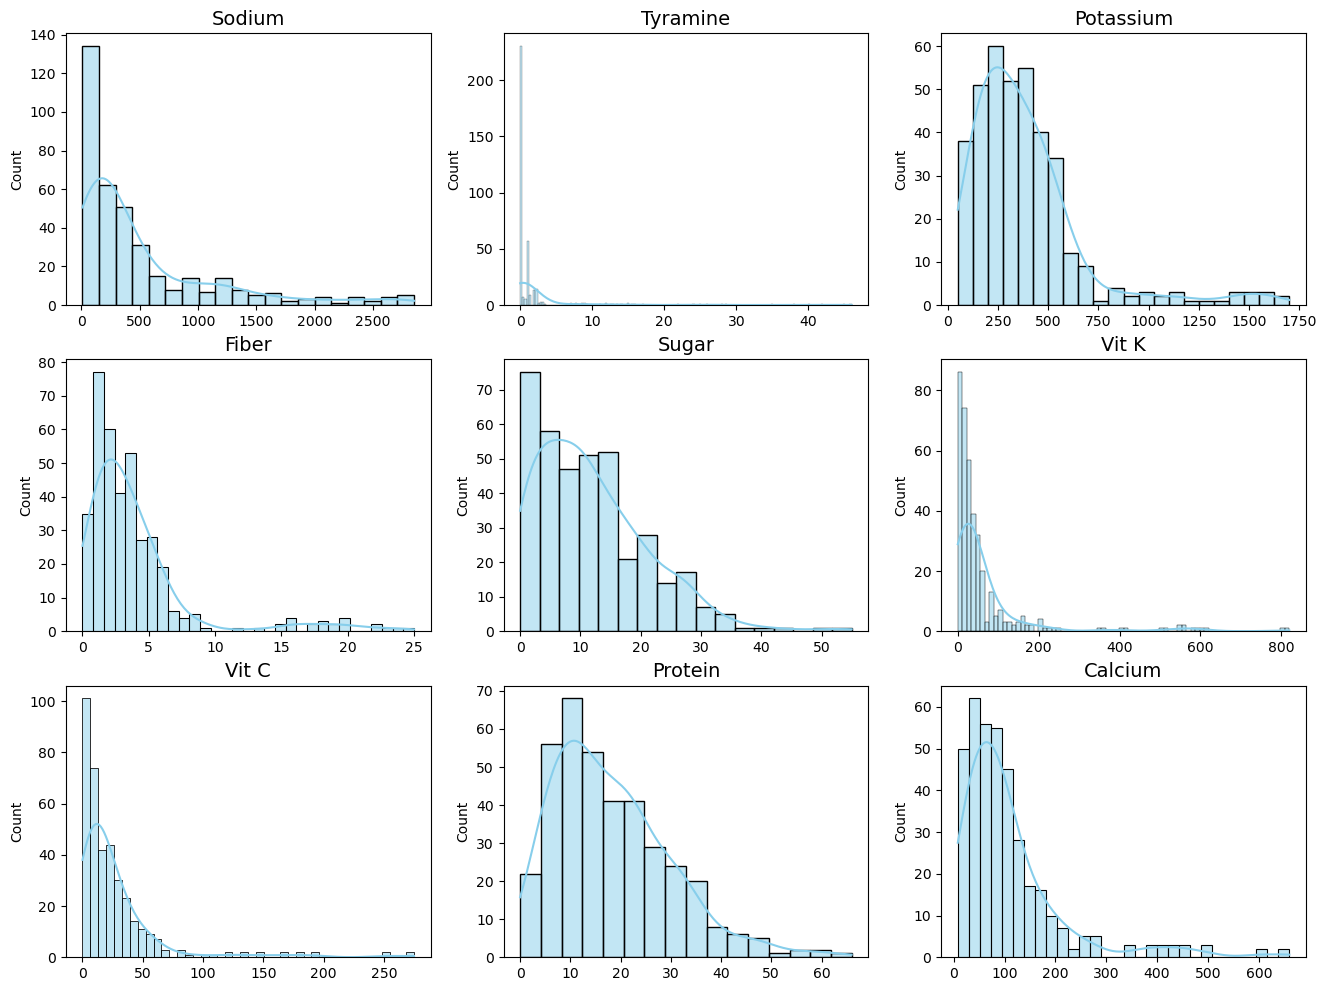

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-2]):
    if col in df.columns:
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(col, fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
plt.show()

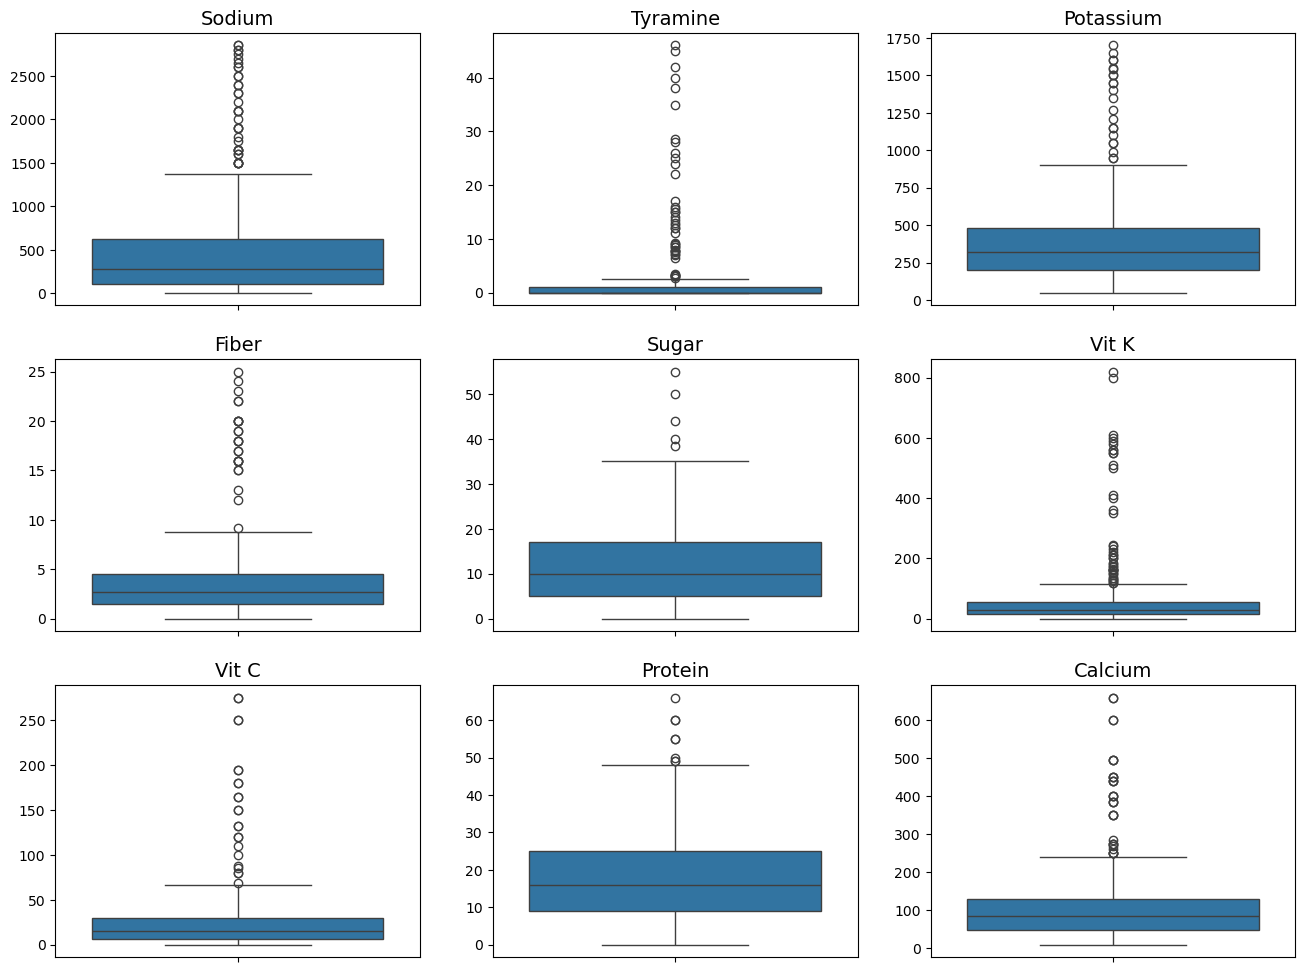

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axes = axes.flatten()
for i, col in enumerate(df.columns[:-2]):
    if i < len(axes):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(col, fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
plt.show()

All the data is right skewed, many outliers might need to test robust scaling, or fix skewness but data is too little to remove outliers

### Relationships

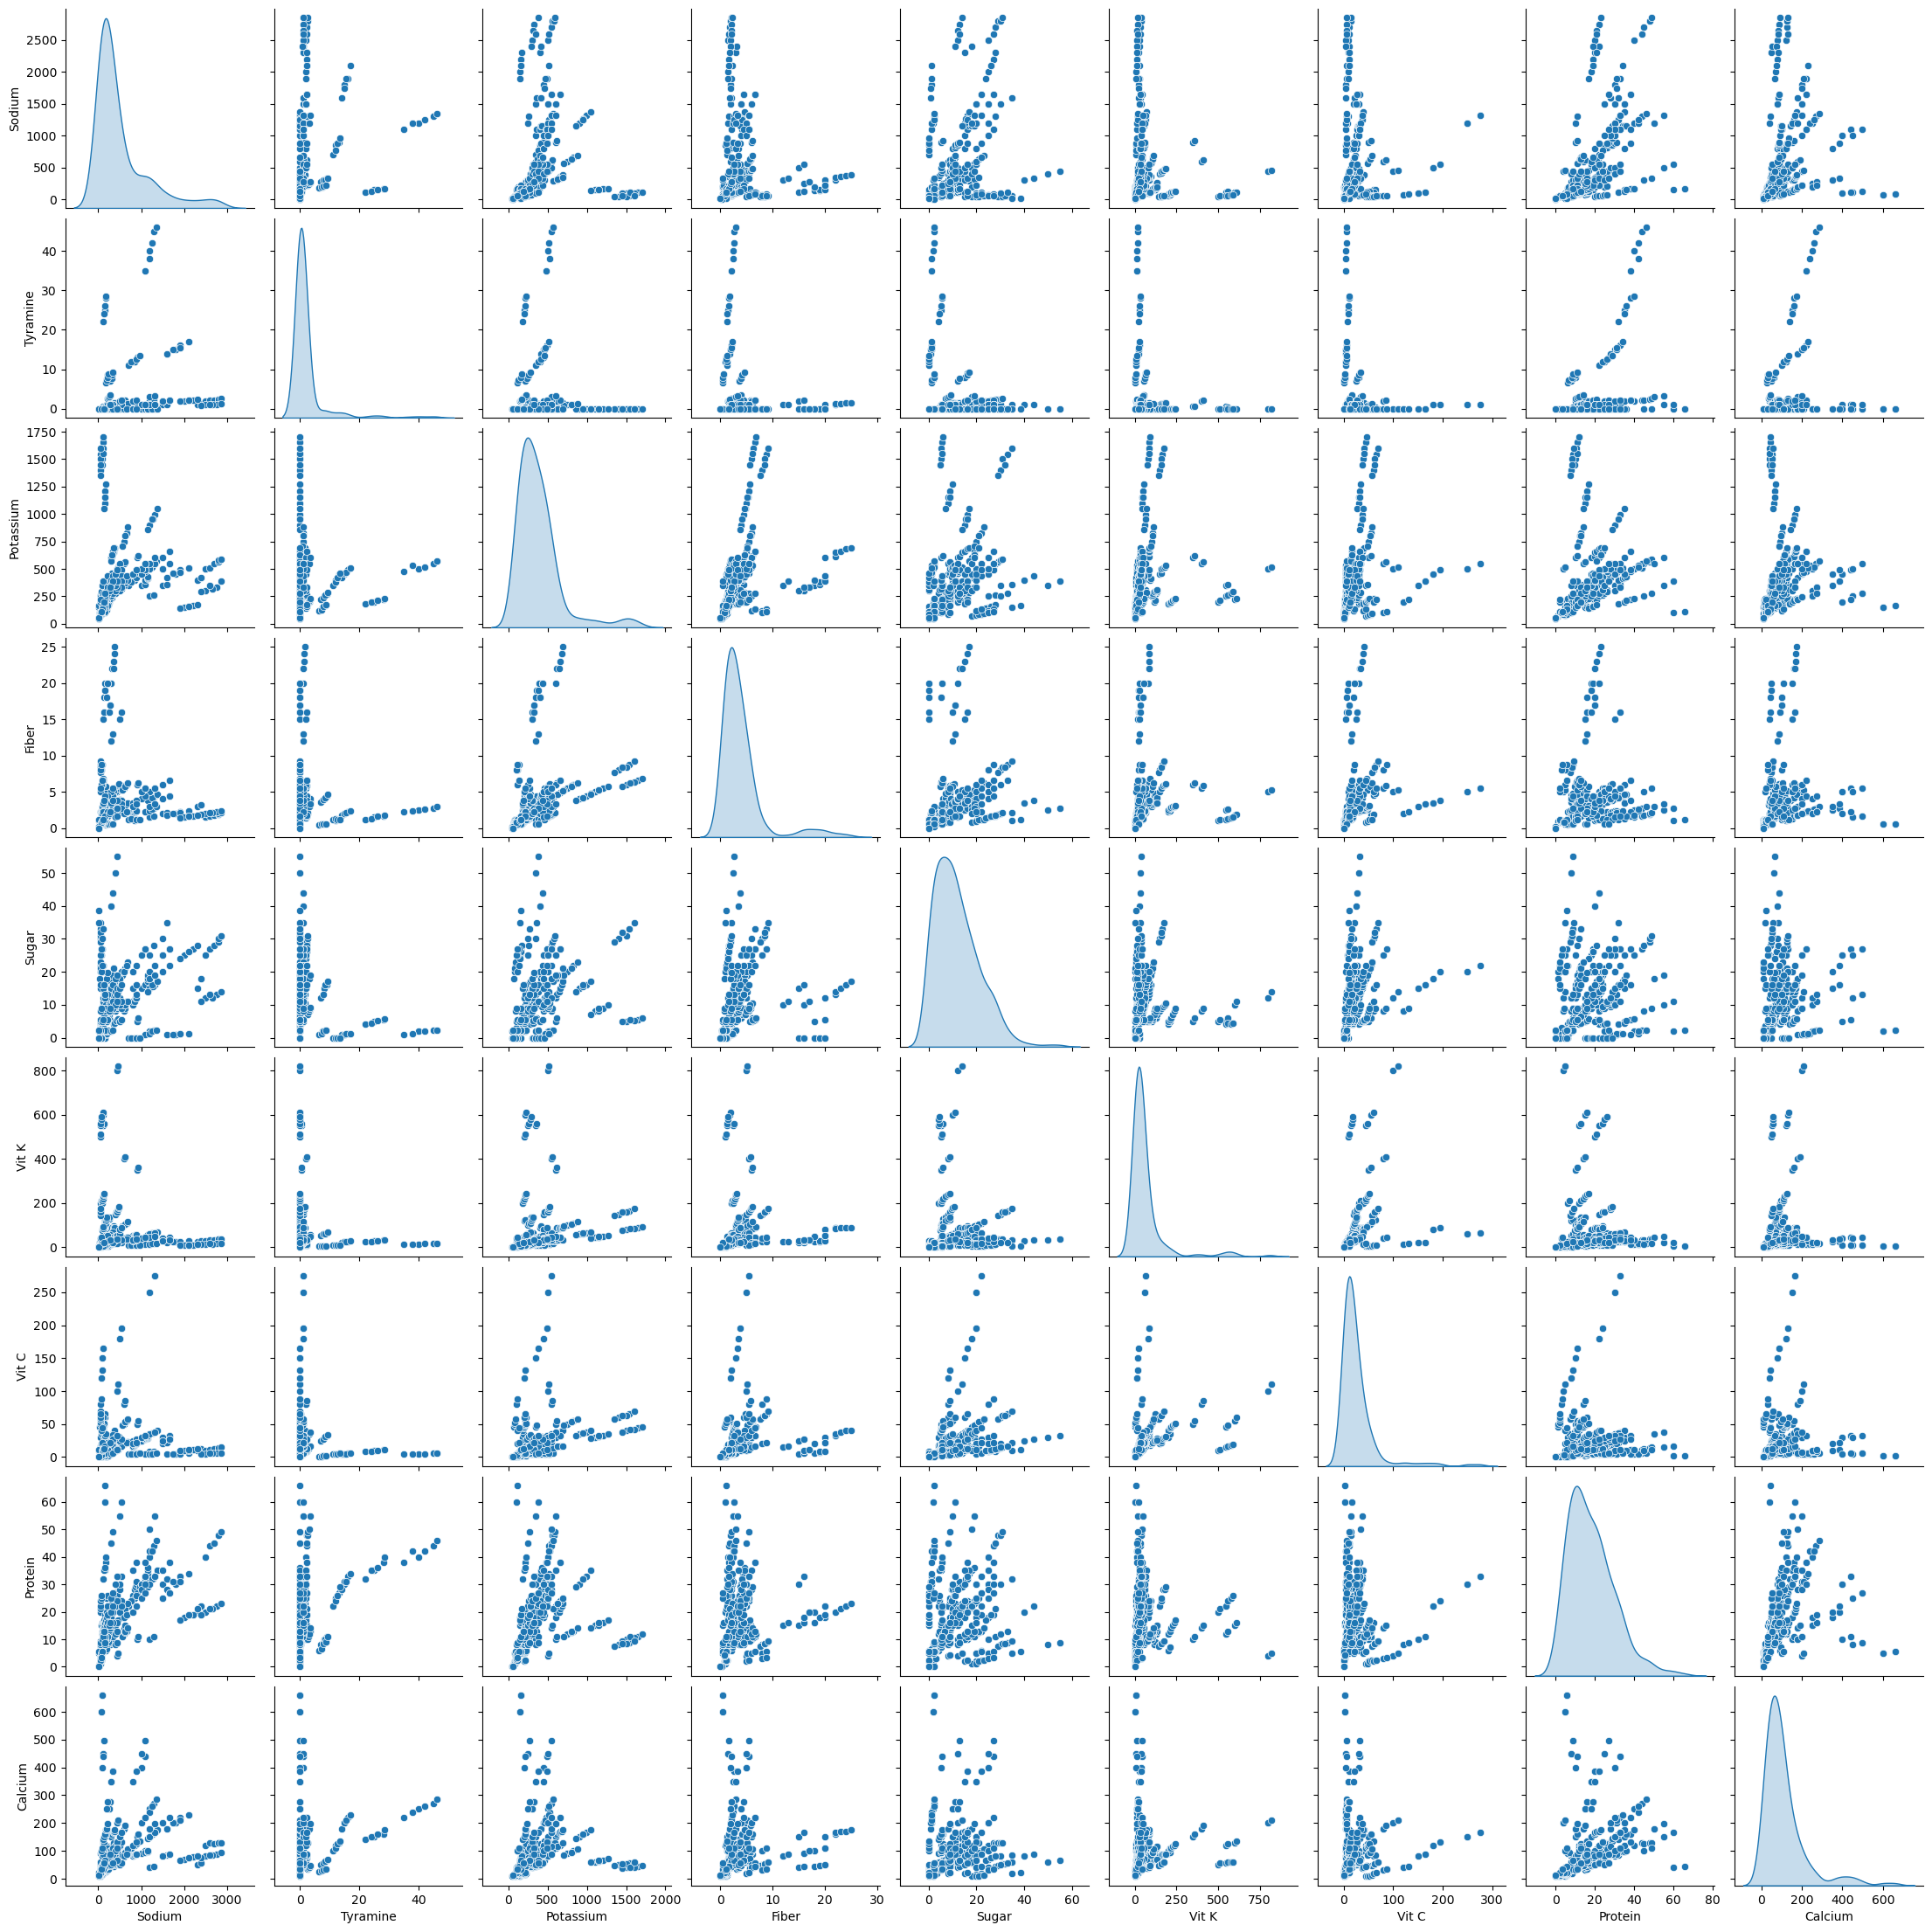

In [9]:
sns.pairplot(
    df,
    kind='scatter',
    diag_kind='kde',
)
plt.show()

Data Variables doesn't seem to hav much of a relationship

### Correlations

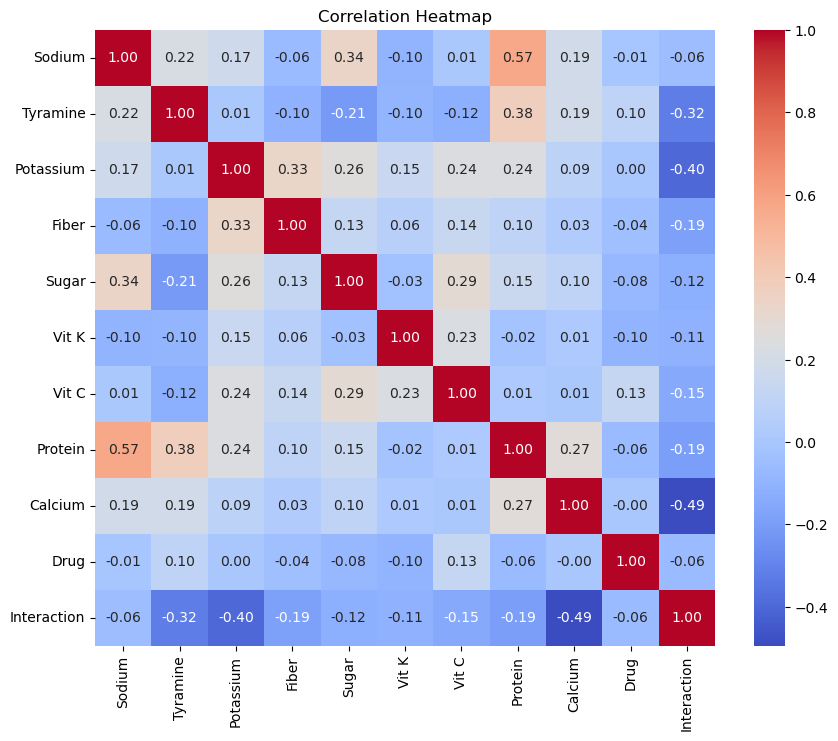

In [10]:
df_copy = df.copy()
categorical_cols = df_copy.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in categorical_cols:
    df_copy[col] = le.fit_transform(df_copy[col])
corr = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Protein and sodium have the highest correlation and also tyramine and Protein also fiber and potasium with label most correlated is calcium, potassium, tyramine

highest correlation with label is low we might need to do feature engineering to have a higher correlation

### Sampling Check

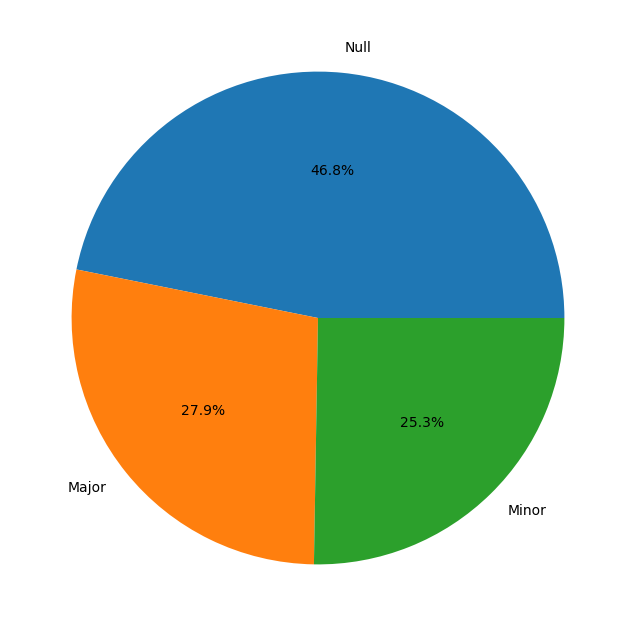

In [11]:
interaction_counts = df["Interaction"].fillna("Null").value_counts()
plt.figure(figsize=(8, 8))
plt.pie(interaction_counts, labels=interaction_counts.index, autopct='%1.1f%%')
plt.show()

In [8]:
df["Interaction"].fillna("Null").value_counts()

Interaction
Null     178
Major    106
Minor     96
Name: count, dtype: int64

The dataset is imbalanced, with no interactions being the most common which reflect real world distribution. We may apply sampling techniques on the training for this imbalance but we will keep the test set unchanged for realistic evaluation.

### Drug Count

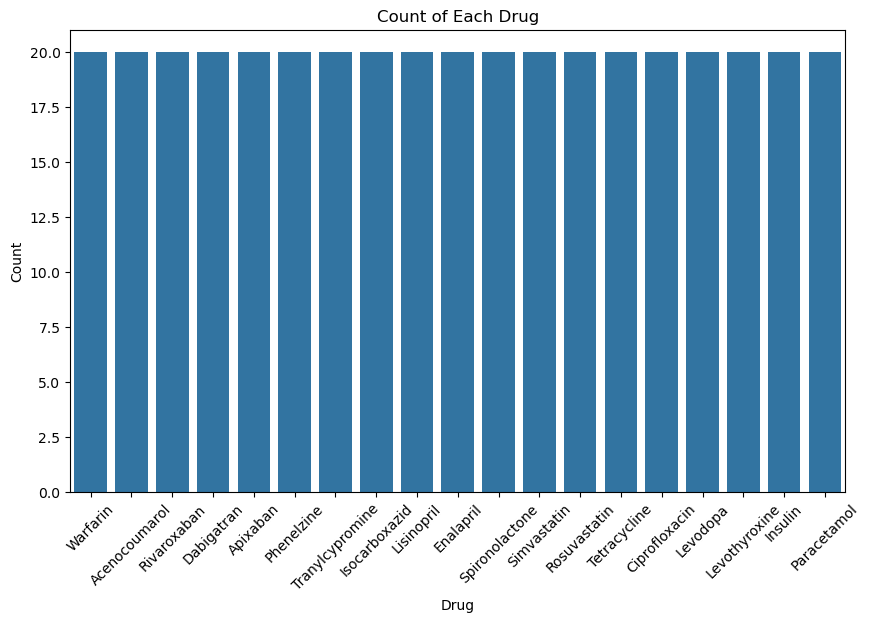

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Drug", order=df["Drug"].value_counts().index)
plt.title("Count of Each Drug")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [14]:
df["Drug"].value_counts()

Drug
Warfarin           20
Acenocoumarol      20
Rivaroxaban        20
Dabigatran         20
Apixaban           20
Phenelzine         20
Tranylcypromine    20
Isocarboxazid      20
Lisinopril         20
Enalapril          20
Spironolactone     20
Simvastatin        20
Rosuvastatin       20
Tetracycline       20
Ciprofloxacin      20
Levodopa           20
Levothyroxine      20
Insulin            20
Paracetamol        20
Name: count, dtype: int64

All drugs seems to be the same amount

# Preprocessing

### Missing Values

In [15]:
df.isna().sum()

Sodium           0
Tyramine         0
Potassium        0
Fiber            0
Sugar            0
Vit K            0
Vit C            0
Protein          0
Calcium          0
Drug             0
Interaction    178
dtype: int64

In [9]:
df["Interaction"]=df["Interaction"].fillna("None")

In [17]:
df["Interaction"].value_counts()

Interaction
None     178
Major    106
Minor     96
Name: count, dtype: int64

###  Encoding

In [10]:
def map_interaction(label):
    mapping = {
        "None": 0,
        "Minor": 1,
        "Major": 2
    }
    return mapping[label]


In [11]:
df["Interaction"] = df["Interaction"].apply(map_interaction)

In [20]:
#drug_target_encoding = (
#    df.groupby("Drug")["Interaction"]
#   .mean()
#    .to_dict()
#)
#df["Drug"] = df["Drug"].map(drug_target_encoding)


In [21]:
df.head()

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug,Interaction
0,120,0.5,350,2.5,5.0,550.0,45.0,12.0,120.0,Warfarin,2
1,50,0.0,100,1.0,2.0,10.0,5.0,5.0,20.0,Warfarin,0
2,2300,1.0,400,3.0,15.0,25.0,10.0,20.0,50.0,Warfarin,0
3,150,0.2,200,4.5,8.0,120.0,60.0,8.0,80.0,Warfarin,1
4,80,0.0,150,0.5,0.0,5.0,2.0,15.0,30.0,Warfarin,0


### Fix Skewing

In [12]:
cols_to_transform = df.columns[:-2]
df[cols_to_transform] = np.log1p(df[cols_to_transform])

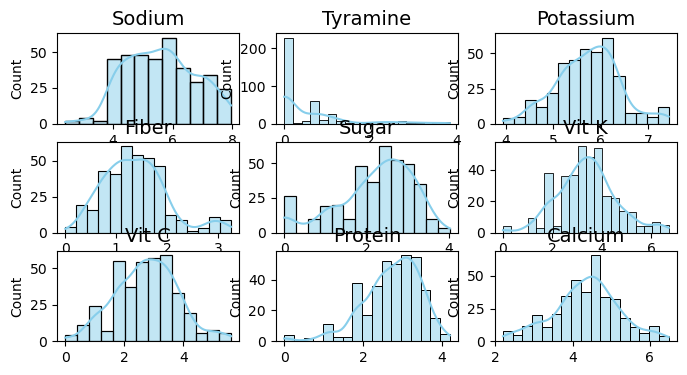

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 4))
axes = axes.flatten()

for i, col in enumerate(df.columns[:-2]):
    if col in df.columns:
        sns.histplot(data=df, x=col, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
        axes[i].set_title(col, fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Count')
plt.show()

### **Train_test_split**

In [14]:
X = df
y = df["Interaction"]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
drug_target_encoding = (
    X_train.groupby("Drug")["Interaction"]
    .mean()
    .to_dict()
)

In [27]:
X_train["Drug"] = X_train["Drug"].map(drug_target_encoding)
X_test["Drug"] = X_test["Drug"].map(drug_target_encoding)



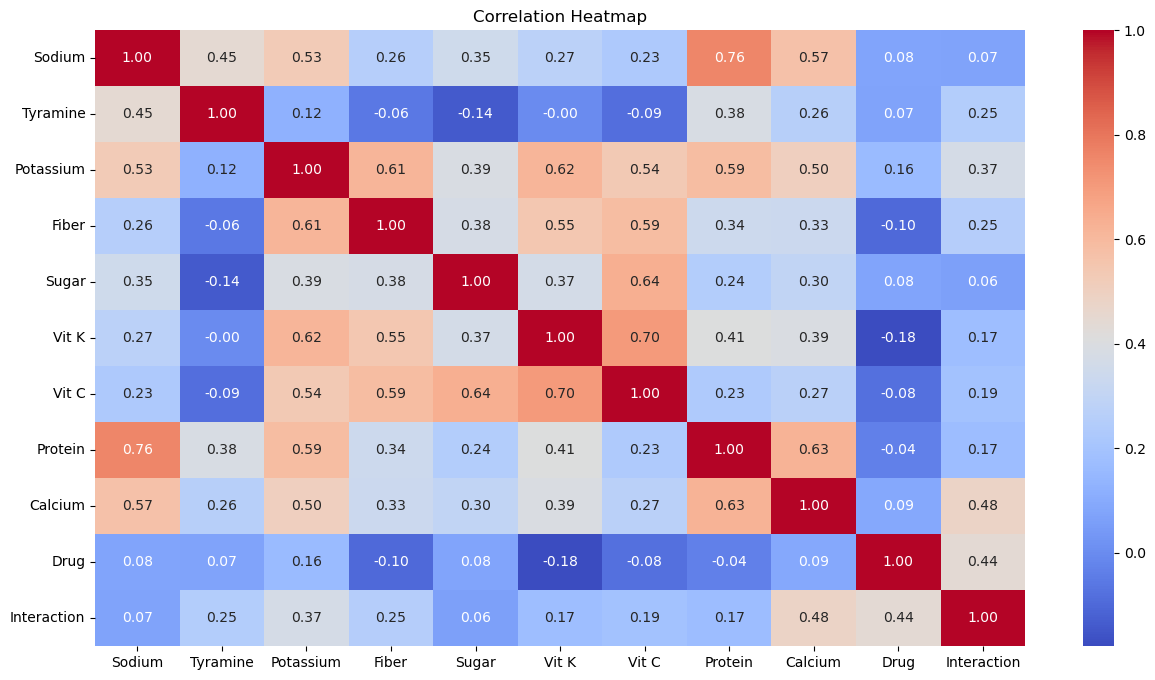

In [28]:
plt.figure(figsize=(15, 8))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [29]:
X_train=X_train.drop(["Interaction"], axis=1)
X_test=X_test.drop(["Interaction"], axis=1)



# Models

### Model 2

In [30]:
X_train2=X_train.copy()
y_train2=y_train.copy()
X_test2=X_test.copy()
y_test2=y_test.copy()

In [31]:
X_train2["CalciumPotassiumSodiumIndex"] = X_train2["Calcium"] * X_train2["Potassium"] / (X_train2["Sodium"] + 1e-4)
X_test2["CalciumPotassiumSodiumIndex"] = X_test2["Calcium"] * X_test2["Potassium"] / (X_test2["Sodium"] + 1e-4)
#X_train2['HighSugarLowVitamin'] = ((X_train2["Sugar"] > X_train2["Sugar"].quantile(0.5)).astype(int) *((X_train2["Vit K"] + X_train2["Vit C"]) < (X_train2["Vit K"] + X_train2["Vit C"]).quantile(0.5)).astype(int))
#X_train2['LowSugarHighFiber'] = ((X_train2['Sugar'] < X_train2['Sugar'].quantile(0.4)).astype(int)*(X_train2['Fiber'] > X_train2['Fiber'].quantile(0.6)).astype(int))
#X_train2['HighVitaminC'] = (X_train2['Vit C'] > X_train2['Vit C'].quantile(0.7)).astype(int)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train2)

In [34]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
param_knn = {
    "n_neighbors": [7,9,11,13,15],
    "weights": ["uniform", "distance"],
    "p": [1]
}



In [ ]:
def run_grid(model, params):
    grid = GridSearchCV(model, params, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
    grid.fit(X_train_resampled, y_train_resampled)
    return grid.best_estimator_

best_knn = run_grid(KNeighborsClassifier(), param_knn)
meta_mlp = MLPClassifier(hidden_layer_sizes=(25, 15), max_iter=1000, random_state=42)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
stack_model = StackingClassifier(
    estimators=[
        ("knn", best_knn)    ],
    final_estimator=meta_mlp,
    passthrough=True
)
stack_model.fit(X_train_resampled, y_train_resampled)

StackingClassifier(estimators=[('knn',
                                KNeighborsClassifier(n_neighbors=7, p=1,
                                                     weights='distance'))],
                   final_estimator=MLPClassifier(hidden_layer_sizes=(25, 15),
                                                 max_iter=1000,
                                                 random_state=42),
                   passthrough=True)

In [ ]:
y_train_pred = stack_model.predict(X_train_resampled)
y_test_pred = stack_model.predict(X_test_scaled)
print("Training Accuracy:", accuracy_score(y_train_resampled, y_train_pred))
print(classification_report(y_train_resampled, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test2, y_test_pred))
print(classification_report(y_test2, y_test_pred))
print("\n")



Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       142

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

Testing Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.90      1.00      0.95        19
           2       1.00      0.90      0.95        21

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.98      0.97      0.97        76





In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[36,  0,  0],
       [ 0, 19,  0],
       [ 0,  2, 19]])

## Model 3

In [ ]:
df2 = df.copy()
df2

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug,Interaction
0,4.795791,0.405465,5.860786,1.252763,1.791759,6.311735,3.828641,2.564949,4.795791,Warfarin,2
1,3.931826,0.000000,4.615121,0.693147,1.098612,2.397895,1.791759,1.791759,3.044522,Warfarin,0
2,7.741099,0.693147,5.993961,1.386294,2.772589,3.258097,2.397895,3.044522,3.931826,Warfarin,0
3,5.017280,0.182322,5.303305,1.704748,2.197225,4.795791,4.110874,2.197225,4.394449,Warfarin,1
4,4.394449,0.000000,5.017280,0.405465,0.000000,1.791759,1.098612,2.772589,3.433987,Warfarin,0
...,...,...,...,...,...,...,...,...,...,...,...
375,5.111988,0.000000,5.620401,1.686399,2.639057,3.332205,2.833213,2.282382,4.204693,Paracetamol,1
376,5.620401,0.741937,5.802118,1.163151,2.282382,3.526361,3.135494,2.833213,4.488636,Paracetamol,0
377,4.204693,0.000000,4.709530,2.282382,3.332205,3.806662,4.488636,1.458615,3.526361,Paracetamol,1
378,6.089045,0.000000,6.206576,0.955511,2.484907,3.663562,2.484907,3.526361,4.709530,Paracetamol,0


In [ ]:
def create_features(data):
    data["calcium_drug"] = data["Calcium"] * data["Drug"]
    data["ca_protein_diff"] = data["Calcium"] - data["Protein"]
    data["ca_po_mul"] = data["Calcium"] * data["Potassium"]
    data["Tyr_Drug_mul"] = data["Tyramine"] * data["Drug"]
    return data

In [ ]:
X_train_eng = create_features(X_train)
X_test_eng = create_features(X_test)

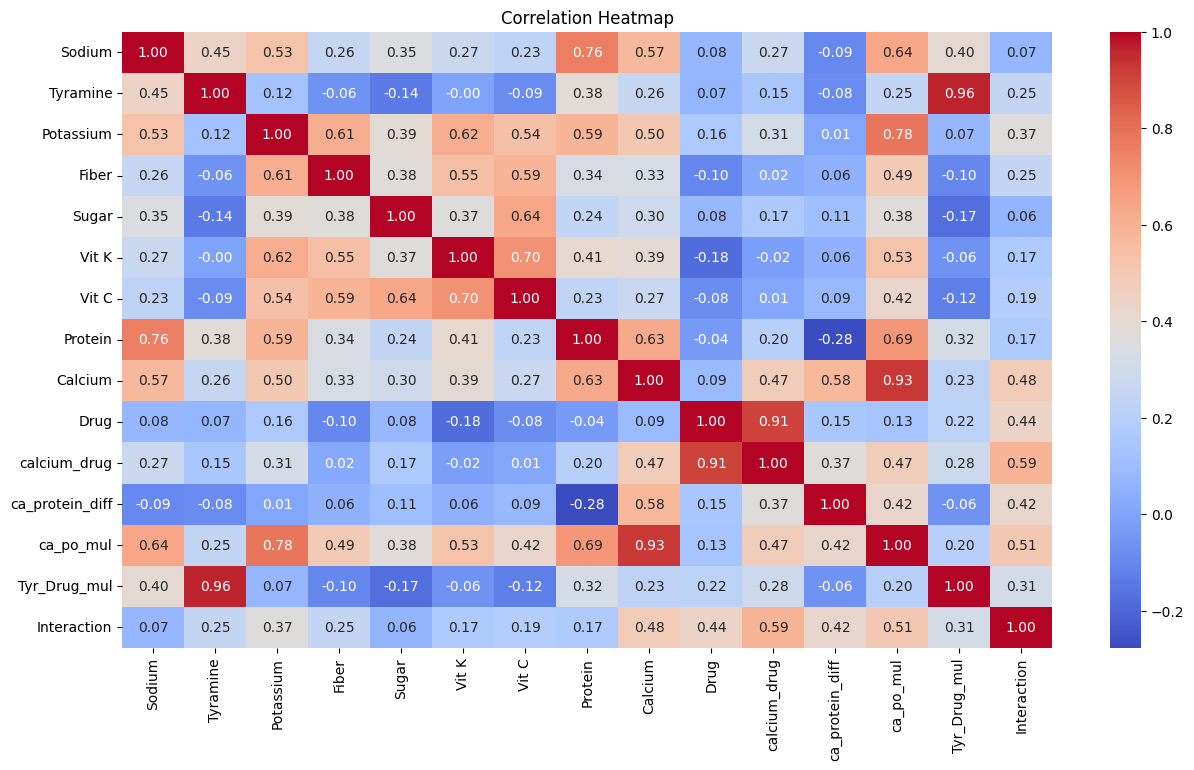

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(pd.concat([X_train_eng,y_train], axis =1).corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_eng)
X_test_scaled = scaler.transform(X_test_eng)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
svm = SVC(probability=True, random_state=42)
params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'linear'],
    'class_weight': ['balanced', None]
}
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    svm, params, cv=cv_strategy, scoring='accuracy', n_jobs=-1, verbose=1
)
grid.fit(X_train_scaled, y_train)
print(f"Best Score: {grid.best_score_:.4f}")
print(f"Best Params: {grid.best_params_}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Score: 0.9573
Best Params: {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svm_best = grid.best_estimator_
y_train_pred = svm_best.predict(X_train_scaled)
y_test_pred = svm_best.predict(X_test_scaled)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))
print("\n")



Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        77
           2       1.00      1.00      1.00        85

    accuracy                           1.00       304
   macro avg       1.00      1.00      1.00       304
weighted avg       1.00      1.00      1.00       304

Testing Accuracy: 0.9868421052631579
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        21

    accuracy                           0.99        76
   macro avg       0.98      0.98      0.98        76
weighted avg       0.99      0.99      0.99        76





Model 4


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
df4=df.copy()

In [17]:
df4

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug,Interaction
0,4.795791,0.405465,5.860786,1.252763,1.791759,6.311735,3.828641,2.564949,4.795791,Warfarin,2
1,3.931826,0.000000,4.615121,0.693147,1.098612,2.397895,1.791759,1.791759,3.044522,Warfarin,0
2,7.741099,0.693147,5.993961,1.386294,2.772589,3.258097,2.397895,3.044522,3.931826,Warfarin,0
3,5.017280,0.182322,5.303305,1.704748,2.197225,4.795791,4.110874,2.197225,4.394449,Warfarin,1
4,4.394449,0.000000,5.017280,0.405465,0.000000,1.791759,1.098612,2.772589,3.433987,Warfarin,0
...,...,...,...,...,...,...,...,...,...,...,...
375,5.111988,0.000000,5.620401,1.686399,2.639057,3.332205,2.833213,2.282382,4.204693,Paracetamol,1
376,5.620401,0.741937,5.802118,1.163151,2.282382,3.526361,3.135494,2.833213,4.488636,Paracetamol,0
377,4.204693,0.000000,4.709530,2.282382,3.332205,3.806662,4.488636,1.458615,3.526361,Paracetamol,1
378,6.089045,0.000000,6.206576,0.955511,2.484907,3.663562,2.484907,3.526361,4.709530,Paracetamol,0


In [18]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sodium       380 non-null    float64
 1   Tyramine     380 non-null    float64
 2   Potassium    380 non-null    float64
 3   Fiber        380 non-null    float64
 4   Sugar        380 non-null    float64
 5   Vit K        380 non-null    float64
 6   Vit C        380 non-null    float64
 7   Protein      380 non-null    float64
 8   Calcium      380 non-null    float64
 9   Drug         380 non-null    object 
 10  Interaction  380 non-null    int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 32.8+ KB


In [46]:
df4['Drug'].value_counts().count()

np.int64(19)

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit and transform the column
df4["Drug_encoded"] = le.fit_transform(df4["Drug"])

# Drop original column if needed
df4 = df4.drop("Drug", axis=1)


In [20]:
df4

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Interaction,Drug_encoded
0,4.795791,0.405465,5.860786,1.252763,1.791759,6.311735,3.828641,2.564949,4.795791,2,18
1,3.931826,0.000000,4.615121,0.693147,1.098612,2.397895,1.791759,1.791759,3.044522,0,18
2,7.741099,0.693147,5.993961,1.386294,2.772589,3.258097,2.397895,3.044522,3.931826,0,18
3,5.017280,0.182322,5.303305,1.704748,2.197225,4.795791,4.110874,2.197225,4.394449,1,18
4,4.394449,0.000000,5.017280,0.405465,0.000000,1.791759,1.098612,2.772589,3.433987,0,18
...,...,...,...,...,...,...,...,...,...,...,...
375,5.111988,0.000000,5.620401,1.686399,2.639057,3.332205,2.833213,2.282382,4.204693,1,10
376,5.620401,0.741937,5.802118,1.163151,2.282382,3.526361,3.135494,2.833213,4.488636,0,10
377,4.204693,0.000000,4.709530,2.282382,3.332205,3.806662,4.488636,1.458615,3.526361,1,10
378,6.089045,0.000000,6.206576,0.955511,2.484907,3.663562,2.484907,3.526361,4.709530,0,10


In [21]:
x4 = df4.drop("Interaction", axis=1)
y4 = df4["Interaction"]

In [22]:
x4

,Sodium,Tyramine,Potassium,Fiber,Sugar,Vit K,Vit C,Protein,Calcium,Drug_encoded
0,4.795791,0.405465,5.860786,1.252763,1.791759,6.311735,3.828641,2.564949,4.795791,18
1,3.931826,0.000000,4.615121,0.693147,1.098612,2.397895,1.791759,1.791759,3.044522,18
2,7.741099,0.693147,5.993961,1.386294,2.772589,3.258097,2.397895,3.044522,3.931826,18
3,5.017280,0.182322,5.303305,1.704748,2.197225,4.795791,4.110874,2.197225,4.394449,18
4,4.394449,0.000000,5.017280,0.405465,0.000000,1.791759,1.098612,2.772589,3.433987,18
...,...,...,...,...,...,...,...,...,...,...
375,5.111988,0.000000,5.620401,1.686399,2.639057,3.332205,2.833213,2.282382,4.204693,10
376,5.620401,0.741937,5.802118,1.163151,2.282382,3.526361,3.135494,2.833213,4.488636,10
377,4.204693,0.000000,4.709530,2.282382,3.332205,3.806662,4.488636,1.458615,3.526361,10
378,6.089045,0.000000,6.206576,0.955511,2.484907,3.663562,2.484907,3.526361,4.709530,10


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x4,
    y4,
    test_size=0.2,
    random_state=42,
    stratify=y4 
)

In [24]:
rf = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=None,       # trees grow fully
    random_state=42,
    n_jobs=-1             # use all CPU cores
)

In [25]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [26]:
y_pred = rf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.881578947368421
              precision    recall  f1-score   support

           0       0.81      0.97      0.89        36
           1       1.00      0.89      0.94        19
           2       0.94      0.71      0.81        21

    accuracy                           0.88        76
   macro avg       0.92      0.86      0.88        76
weighted avg       0.89      0.88      0.88        76

